#                          Fake News Detection using Machine Learning

In [ ]:
!pip install wordcloud


In [1]:
import pandas as pd

In [2]:
fake_df = pd.read_csv("data/Fake.csv")
true_df = pd.read_csv("data/True.csv")
fake_df


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
# Add labels to the datasets
fake_df["label"] = 1  # Fake news
true_df["label"] = 0  # Real news



In [5]:
# Combine both datasets
df = pd.concat([fake_df, true_df], axis=0)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the dataset
df.head()



,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",1
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",0
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",0
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",1
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",0


In [6]:
df = df.dropna()  
X = df['text']  
y = df['label']  


In [7]:
df.label.value_counts()

1    23481
0    21417
Name: label, dtype: int64

In [8]:
df.text[1]

'WASHINGTON (Reuters) - U.S. President Donald Trump removed his chief strategist Steve Bannon from the National Security Council on Wednesday, reversing his controversial decision early this year to give a political adviser an unprecedented role in security discussions. Trump’s overhaul of the NSC, confirmed by a White House official, also elevated General Joseph Dunford, chairman of the Joint Chiefs of Staff and Dan Coats, the director of National Intelligence who heads all 17 U.S. intelligence agencies. The official said the change moves the NSC “back to its core function of what it’s supposed to do.” It also appears to mark a victory for national security adviser H.R. McMaster, who had told some national security experts he felt he was in a “battle to the death” with Bannon and others on the White House staff. Vice President Mike Pence said Bannon would continue to play an important role in policy and played down the shake-up as routine. “This is just a natural evolution to ensure t

In [9]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation & numbers
    text = text.lower().strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vectorized = vectorizer.fit_transform(X)


In [11]:
X_vectorized.shape

(44898, 121689)

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [13]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6405
           1       0.94      0.94      0.94      7065

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



In [15]:
print(confusion_matrix(y_test,y_pred))

[[5948  457]
 [ 426 6639]]


<Axes: >

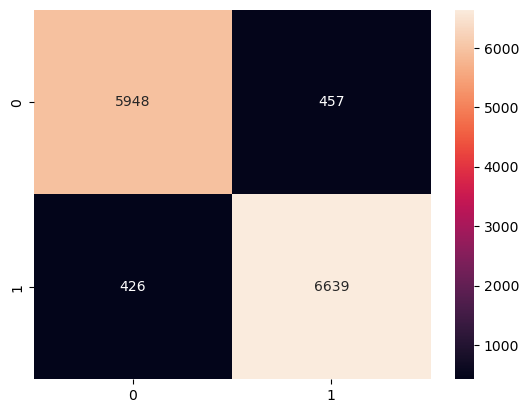

In [17]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [18]:
print(accuracy_score(y_test,y_pred))

0.9344469190794358


In [19]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 93.44%


In [20]:
def predict_news(news_text):
    vectorized = vectorizer.transform([news_text])
    prediction = model.predict(vectorized)
    return "Fake" if prediction[0] == 1 else "Real"

# Test
print(predict_news("The government has announced a new policy to support farmers."))


Real


In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(max_iter=1000)
pac.fit(X_train, y_train)

y_pred_pac = pac.predict(X_test)

print(classification_report(y_test, y_pred_pac))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6405
           1       0.99      0.99      0.99      7065

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [22]:
print(confusion_matrix(y_test,y_pred_pac))

[[6364   41]
 [  55 7010]]


<Axes: >

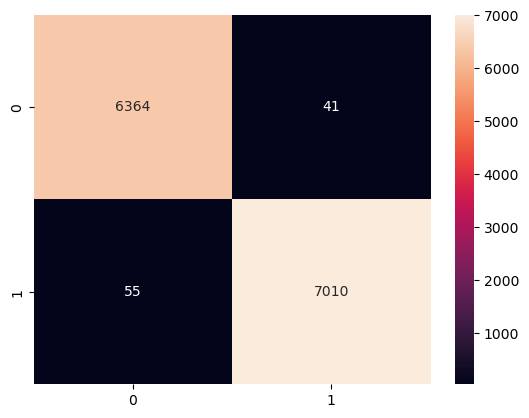

In [23]:
cm = confusion_matrix(y_test, y_pred_pac)
sns.heatmap(cm, annot=True, fmt='d')


In [24]:
print("PAC Accuracy:", accuracy_score(y_test, y_pred_pac))

PAC Accuracy: 0.9928730512249443


In [25]:
def show_top_words_nb(vectorizer, model, n=10):
    class_labels = model.classes_
    feature_names = vectorizer.get_feature_names_out()
    top_words = {}

    for i, class_label in enumerate(class_labels):
        top_feature_indices = model.feature_log_prob_[i].argsort()[::-1][:n]
        top_words[class_label] = [feature_names[j] for j in top_feature_indices]

    return top_words

top_words = show_top_words_nb(vectorizer, model)
print("Top Real News Words:", top_words[0])
print("Top Fake News Words:", top_words[1])



Top Real News Words: ['trump', 'reuters', 'president', 'house', 'state', 'government', 'washington', 'republican', 'united', 'states']
Top Fake News Words: ['trump', 'clinton', 'obama', 'people', 'president', 'hillary', 'just', 'like', 'donald', 'twitter']


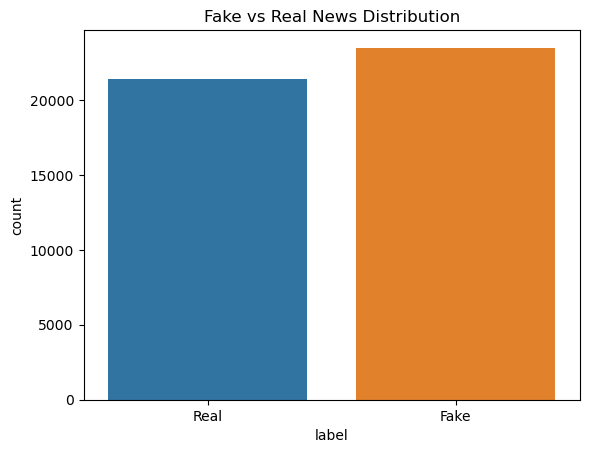

In [26]:
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Fake vs Real News Distribution")
plt.xticks([0, 1], ["Real", "Fake"])
plt.show()


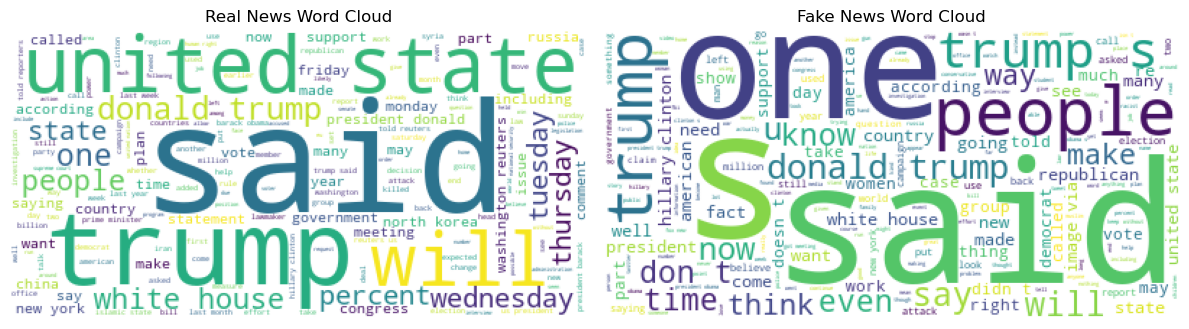

In [27]:
from wordcloud import WordCloud

real_words = " ".join(df[df['label'] == 0]['clean_text'])
fake_words = " ".join(df[df['label'] == 1]['clean_text'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Real News Word Cloud")
plt.imshow(WordCloud(background_color='white').generate(real_words))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Fake News Word Cloud")
plt.imshow(WordCloud(background_color='white').generate(fake_words))
plt.axis('off')

plt.tight_layout()
plt.show()


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {
    "Naive Bayes": MultinomialNB(),
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=1000)
}
results = []

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

In [30]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending=False)
results_df.reset_index(drop=True, inplace=True)

print("Model Comparison:\n")
results_df

Model Comparison:



,Model,Accuracy,Precision,Recall,F1 Score
0,Passive Aggressive,0.993318,0.995313,0.991932,0.993620
1,Naive Bayes,0.934447,0.935598,0.939703,0.937646


In [31]:
results_df = pd.DataFrame([
    {
        "Model": "Naive Bayes",
        "Accuracy": accuracy_score(y_test, model.predict(X_test)),
        "Precision": precision_score(y_test, model.predict(X_test)),
        "Recall": recall_score(y_test, model.predict(X_test)),
        "F1 Score": f1_score(y_test, model.predict(X_test))
    },
    {
        "Model": "Passive Aggressive",
        "Accuracy": accuracy_score(y_test, pac.predict(X_test)),
        "Precision": precision_score(y_test, pac.predict(X_test)),
        "Recall": recall_score(y_test, pac.predict(X_test)),
        "F1 Score": f1_score(y_test, pac.predict(X_test))
    }
])

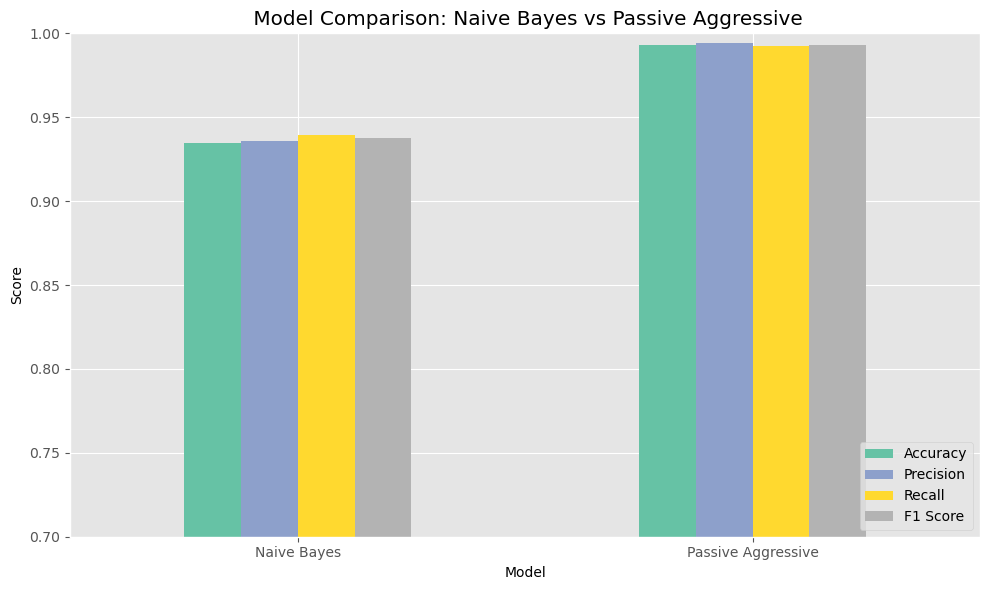

In [32]:
plt.style.use('ggplot')

results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar',
    figsize=(10, 6),
    ylim=(0.7, 1.0),
    colormap='Set2'
)

plt.title(" Model Comparison: Naive Bayes vs Passive Aggressive")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()